In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Subir el archivo .csv desde el ordenador
print("Sube tu archivo .csv")
uploaded = files.upload()

Sube tu archivo .csv


Saving Metallodrugs_Properties_KNIME.csv to Metallodrugs_Properties_KNIME.csv


In [ ]:
# Leer el archivo .csv en un DataFrame
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Verificar las primeras filas del DataFrame
df.head()

,Name,Type,SlogP,TPSA,ExactMW,NumRotatableBonds,NumHBD,NumHBA
0,Cisplatin,Metallodrug,1.7005,70.00,298.955595,0,2,2
1,Oxaliplatin,Metallodrug,1.5551,122.20,397.060148,0,2,2
2,Carboplatin,Metallodrug,1.7576,141.60,371.044498,2,2,2
3,Lobaplatin,Metallodrug,-2.5874,115.23,397.095436,3,2,5
4,Nedaplatin,Metallodrug,-0.6152,127.53,305.033933,1,4,4


<ipython-input-16-39a523d963ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type", y=column, data=df, palette="muted", ax=ax)
<ipython-input-16-39a523d963ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type", y=column, data=df, palette="muted", ax=ax)
<ipython-input-16-39a523d963ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type", y=column, data=df, palette="muted", ax=ax)
<ipython-input-16-39a523d963ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

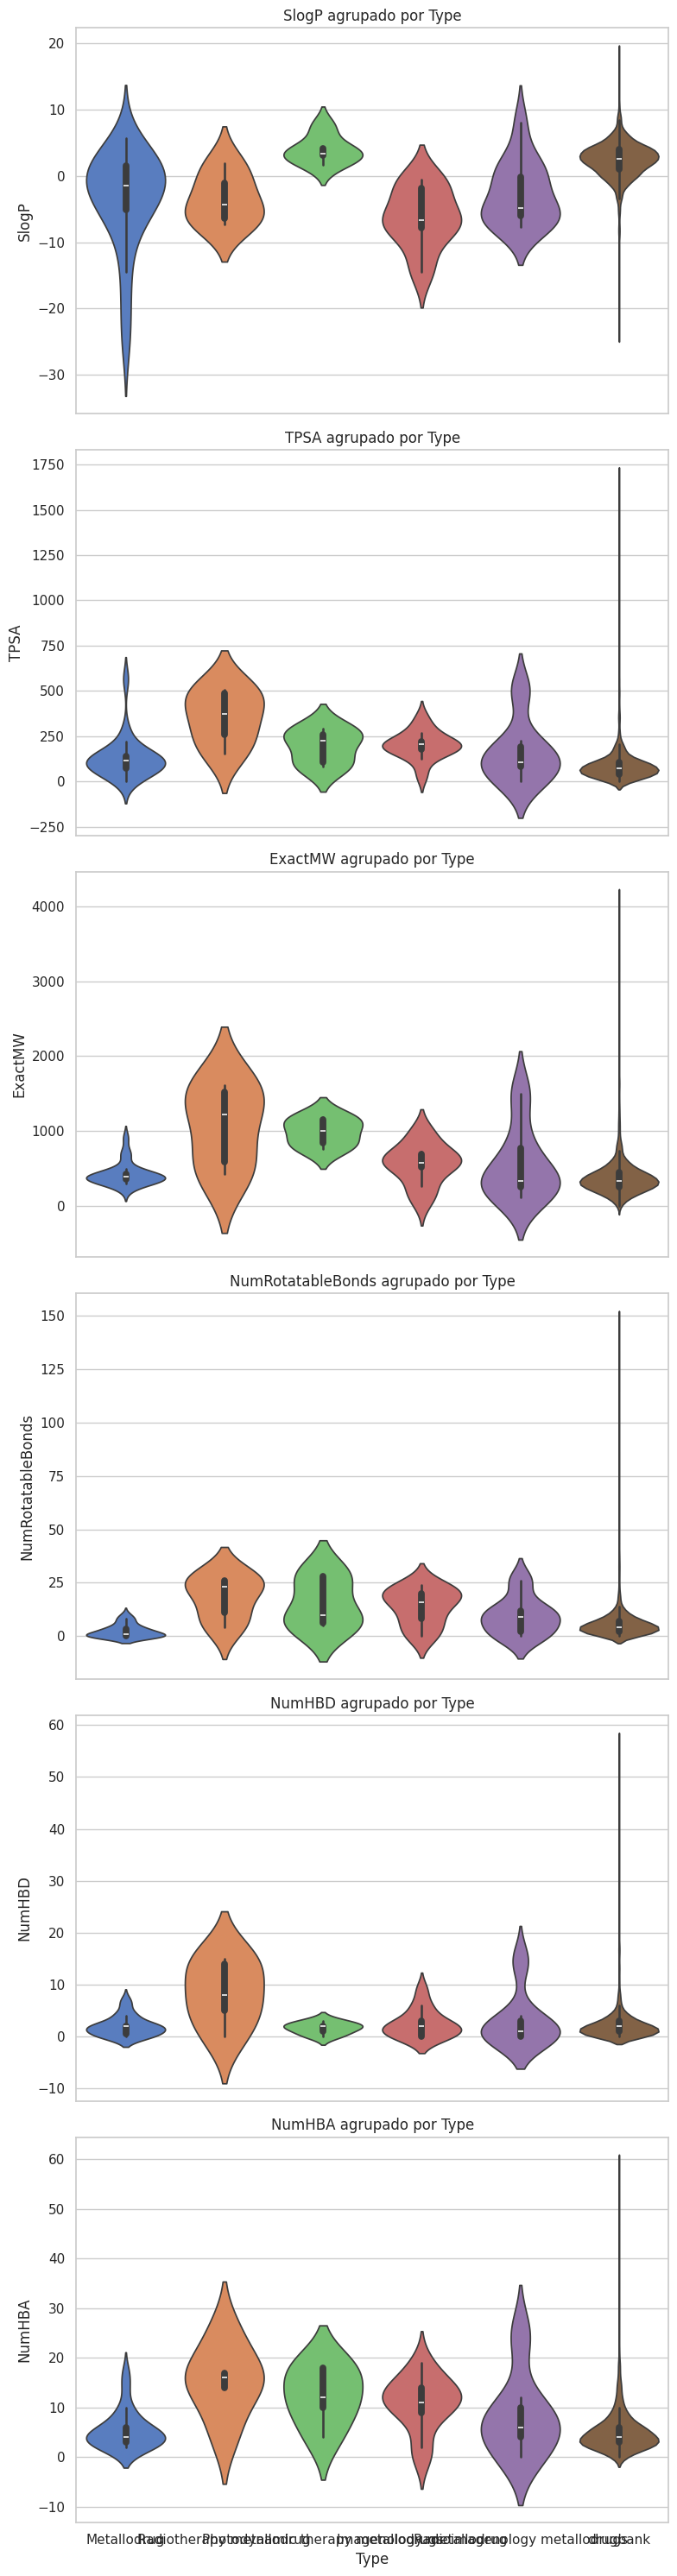

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear gráficos de violín para las columnas "X", "Y" y "Z" agrupados por "Type"
columns_to_plot = ["SlogP", "TPSA", "ExactMW", "NumRotatableBonds", "NumHBD", "NumHBA"]

valid_columns = [col for col in columns_to_plot if col in df.columns]

if len(valid_columns) > 0:
    fig, axes = plt.subplots(len(valid_columns), 1, figsize=(8, 5 * len(valid_columns)), sharex=True)
    if len(valid_columns) == 1:  # En caso de que solo haya una columna válida
        axes = [axes]

    for ax, column in zip(axes, valid_columns):
        sns.violinplot(x="Type", y=column, data=df, palette="muted", ax=ax)
        ax.set_title(f'{column} agrupado por Type')
        ax.set_xlabel("Type")
        ax.set_ylabel(column)

    plt.tight_layout()
    plt.show()

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Definir la paleta de colores personalizada
# Modifica los colores según las categorías de tu columna "Type"
custom_palette = {
    "Categoria1": "red",
    "Categoria2": "blue",
    "Categoria3": "green",
    "Categoria4": "purple"
    "Categoria4": "purple"
}

# Crear una única figura con subgráficos
columns_to_plot = ["SlogP", "TPSA", "ExactMW", "NumRotatableBonds", "NumHBD", "NumHBA"]
valid_columns = [col for col in columns_to_plot if col in df.columns]

if len(valid_columns) > 0:
    fig, axes = plt.subplots(len(valid_columns), 1, figsize=(8, 5 * len(valid_columns)), sharex=True)
    if len(valid_columns) == 1:  # En caso de que solo haya una columna válida
        axes = [axes]

    for ax, column in zip(axes, valid_columns):
        sns.violinplot(
            x="Type",
            y=column,
            data=df,
            palette=custom_palette,
            ax=ax
        )
        ax.set_title(f'{column} agrupado por Type')
        ax.set_xlabel("Type")
        ax.set_ylabel(column)

    plt.tight_layout()
    plt.show()


In [ ]:
# Variables a analizar
columns_to_analyze = ["SlogP", "TPSA", "ExactMW", "NumRotatableBonds", "NumHBD", "NumHBA"]

# Verificar que las columnas existan en el DataFrame
valid_columns = [col for col in columns_to_analyze if col in df.columns]

if len(valid_columns) > 0 and "Type" in df.columns:
    # Calcular media y desviación estándar para cada categoría de 'Type'
    summary_table = df.groupby("Type")[valid_columns].agg(['mean', 'std']).reset_index()

    # Renombrar las columnas para mayor claridad
    summary_table.columns = ['Type'] + [f'{col}_{stat}' for col in valid_columns for stat in ['mean', 'std']]

    # Mostrar la tabla
    print("Tabla de estadísticas descriptivas:")
    print(summary_table)

    # Guardar la tabla en un archivo .csv
    output_file = "summary_statistics.csv"
    summary_table.to_csv(output_file, index=False)
    print(f"Archivo de estadísticas guardado como: {output_file}")


Tabla de estadísticas descriptivas:
                                Type  SlogP_mean  SlogP_std   TPSA_mean  \
0            Imagenology metallodrug   -6.304728   4.437713  201.181538   
1                        Metallodrug   -3.726462   7.503747  129.843043   
2  Photodynamic therapy metallodrugs    3.916324   2.120545  192.760000   
3      Radioimagenology metallodrugs   -2.640026   4.729277  161.906923   
4           Radiotherapy metallodrug   -3.471220   3.832905  355.784000   
5                           drugbank    2.427025   2.754101   90.500154   

     TPSA_std  ExactMW_mean  ExactMW_std  NumRotatableBonds_mean  \
0   77.252402    563.548796   267.256469               13.923077   
1  113.337230    425.370672   151.003105                2.478261   
2   94.333651    988.265062   184.739373               15.400000   
3  167.780667    554.630169   472.404324                9.538462   
4  150.035830   1071.279030   540.324310               18.200000   
5  102.512641    384.024608   

In [ ]:
summary_table

,Type,SlogP_mean,SlogP_std,TPSA_mean,TPSA_std,ExactMW_mean,ExactMW_std,NumRotatableBonds_mean,NumRotatableBonds_std,NumHBD_mean,NumHBD_std,NumHBA_mean,NumHBA_std
0,Imagenology metallodrug,-6.304728,4.437713,201.181538,77.252402,563.548796,267.256469,13.923077,8.460315,2.461538,2.726884,10.923077,5.330127
1,Metallodrug,-3.726462,7.503747,129.843043,113.337230,425.370672,151.003105,2.478261,3.058068,1.956522,1.918291,5.521739,3.859693
2,Photodynamic therapy metallodrugs,3.916324,2.120545,192.760000,94.333651,988.265062,184.739373,15.400000,11.653326,1.600000,1.140175,12.400000,5.899152
3,Radioimagenology metallodrugs,-2.640026,4.729277,161.906923,167.780667,554.630169,472.404324,9.538462,8.780807,3.076923,5.235481,8.307692,8.086868
4,Radiotherapy metallodrug,-3.471220,3.832905,355.784000,150.035830,1071.279030,540.324310,18.200000,10.183320,8.400000,6.268971,15.400000,7.162402
5,drugbank,2.427025,2.754101,90.500154,102.512641,384.024608,269.473395,5.859944,7.804057,2.246032,3.551801,5.198413,4.561003


from matplotlib import pyplot as plt
summary_table['SlogP_mean'].plot(kind='hist', bins=20, title='SlogP_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table['SlogP_std'].plot(kind='hist', bins=20, title='SlogP_std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table['TPSA_mean'].plot(kind='hist', bins=20, title='TPSA_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table['TPSA_std'].plot(kind='hist', bins=20, title='TPSA_std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
summary_table.groupby('Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table.plot(kind='scatter', x='SlogP_mean', y='SlogP_std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table.plot(kind='scatter', x='SlogP_std', y='TPSA_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table.plot(kind='scatter', x='TPSA_mean', y='TPSA_std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table.plot(kind='scatter', x='TPSA_std', y='ExactMW_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_table['SlogP_mean'].plot(kind='line', figsize=(8, 4), title='SlogP_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_table['SlogP_std'].plot(kind='line', figsize=(8, 4), title='SlogP_std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_table['TPSA_mean'].plot(kind='line', figsize=(8, 4), title='TPSA_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_table['TPSA_std'].plot(kind='line', figsize=(8, 4), title='TPSA_std')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(summary_table['Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(summary_table, x='SlogP_mean', y='Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(summary_table['Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(summary_table, x='SlogP_std', y='Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(summary_table['Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(summary_table, x='TPSA_mean', y='Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(summary_table['Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(summary_table, x='TPSA_std', y='Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)